In [1]:
import numpy as np
import pandas as pd 
import astropy.io.ascii as ascii
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

In [2]:
#reading in the cat files" 
parameters08 = ascii.read("GRB210605A5_20210608_g_stack_ext5.resamp_sub_withnans_SUB.cat")
parameters09 = ascii.read("GRB210605A5_20210609_g_stack_ext5.resamp_sub_withnans_SUB.cat")
parameters10 = ascii.read("GRB210605A5_20210610_g_stack_ext5.resamp_sub_withnans_SUB.cat")

#initialising the panda dataframes
data08 = pd.DataFrame(parameters08.as_array())
data09 = pd.DataFrame(parameters09.as_array())
data10 = pd.DataFrame(parameters10.as_array())

#filtering out the 'fake' data
data08f = data08[data08['MAG_AUTO'] < 20]
data09f = data09[data09['MAG_AUTO'] < 20]
data10f = data10[data10['MAG_AUTO'] < 20]

#indexing: getting arrays that only contain the X/Y coordinates of the sources
xworld08 = data08f['X_WORLD']
yworld08 = data08f['Y_WORLD']

xworld09 = data09f['X_WORLD']
yworld09 = data09f['Y_WORLD']

xworld10 = data10f['X_WORLD']
yworld10 = data10f['Y_WORLD']

In [3]:
#reading in the X/Y coordinates in a 'workable' form (SkyCoord)
coord08 = SkyCoord(ra=xworld08*u.degree, dec=yworld08*u.degree)
coord09 = SkyCoord(ra=xworld09*u.degree, dec=yworld09*u.degree)
coord10 = SkyCoord(ra=xworld10*u.degree, dec=yworld10*u.degree)

In [4]:
#finding the matches between 08 and 09
idx, d2d, d3d = coord08.match_to_catalog_sky(coord09)

max_sep = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

data08_0809_matches = data08f[sep_constraint]
data09_0809_matches = data09f.iloc[idx[sep_constraint]]

In [5]:
#putting the 08 matches into a workable form 
xworld08_0809 = data08_0809_matches['X_WORLD']
yworld08_0809 = data08_0809_matches['Y_WORLD']

coord08_0809 = SkyCoord(ra=xworld08_0809*u.degree, dec=yworld08_0809*u.degree)
coord10 = SkyCoord(ra=xworld10*u.degree, dec=yworld10*u.degree)

#finding the matches between 08(0809) and 10
idx, d2d, d3d = coord08_0809.match_to_catalog_sky(coord10) 

max_sep = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

#these are the matches that 08 has with 10 and 10 has with 08
data08_080910_matches = data08_0809_matches[sep_constraint]
data10_080910_matches = data10f.iloc[idx[sep_constraint]]

#because data09_080910_matches is the exact same as data08_080910, we can basically change it the same way as we did with 08.
data09_080910_matches = data09_0809_matches[sep_constraint]

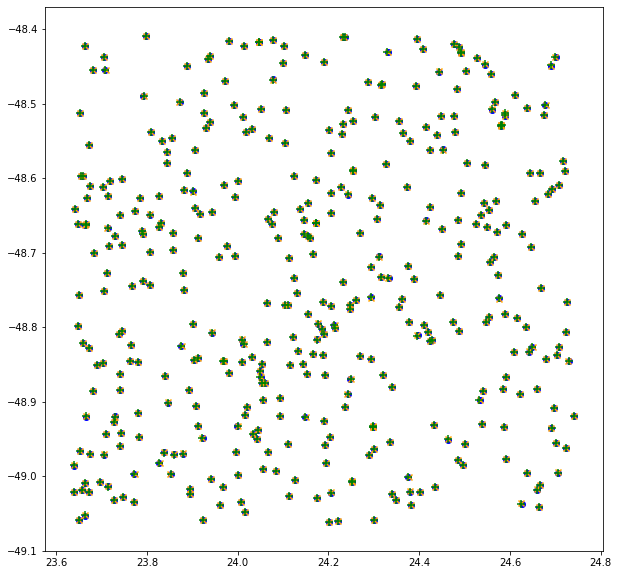

In [6]:
#plotting down all 3 catalogues of matches
xworld08_080910 = data08_080910_matches['X_WORLD']
yworld08_080910 = data08_080910_matches['Y_WORLD']

xworld09_080910 = data09_080910_matches['X_WORLD']
yworld09_080910 = data09_080910_matches['Y_WORLD']

xworld10_080910 = data10_080910_matches['X_WORLD']
yworld10_080910 = data10_080910_matches['Y_WORLD']


plt.figure(figsize = (10,10))
plt.scatter(xworld08_080910,yworld08_080910,color = 'b', marker = 'o')
plt.scatter(xworld09_080910,yworld09_080910, color = 'orange', marker = 'x')
plt.scatter(xworld10_080910,yworld10_080910,color = 'g', marker = '+', s = 50)

In [7]:
data08_080910_matches
#data09_080910_matches
# data10_080910_matches

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
1,2,731.4904,69.95326,2.272,439.4568,28.84985,4808.6987,18.1275,24.201414,-49.061333,...,-0.392960,2.010,1.491,-38.80,51.20,34,8.95,0.000663,58,0.258
2,3,565.6078,88.24388,2.585,269.0930,28.96760,4638.3315,28.0253,24.220661,-49.060597,...,-0.191445,2.628,1.784,6.82,-83.21,34,12.98,0.000961,52,0.321
4,5,1089.6600,86.78520,2.608,513.0654,28.82033,9680.9355,31.8874,23.651005,-49.059079,...,0.858309,2.812,1.610,20.70,-68.98,53,12.75,0.000944,73,0.427
7,8,1297.0790,84.29800,2.117,827.2916,28.93821,7265.4102,44.2881,23.923882,-49.059101,...,0.285726,2.673,1.599,60.13,-29.75,57,8.75,0.000647,74,0.402
15,16,673.6740,115.22220,3.928,206.2112,28.93821,3932.8682,51.7681,24.300354,-49.058788,...,0.201239,2.491,1.375,6.76,-83.32,20,11.09,0.000821,42,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,12828,649.2682,72.34551,2.235,359.1207,28.96760,4046.9932,7996.1460,24.286281,-48.470704,...,-0.673087,2.143,1.463,47.57,-42.47,31,9.37,0.000694,42,0.317
12830,12831,950.9474,95.20261,2.083,657.0572,28.96760,9466.8408,8195.8486,23.681296,-48.454861,...,-0.017541,2.571,2.143,89.58,-0.03,65,8.63,0.000639,101,0.167
12845,12846,726.7049,68.72591,2.048,488.0315,28.93821,9244.7373,8426.4346,23.706247,-48.437898,...,-0.203119,1.920,1.543,5.03,-84.62,39,7.73,0.000572,46,0.197
12869,12870,519884.4000,197.96520,5.853,51474.8900,28.82033,4501.2734,8802.8740,24.235501,-48.411018,...,-0.605267,5.040,4.749,70.02,-20.02,1122,10.10,0.000747,1380,0.058


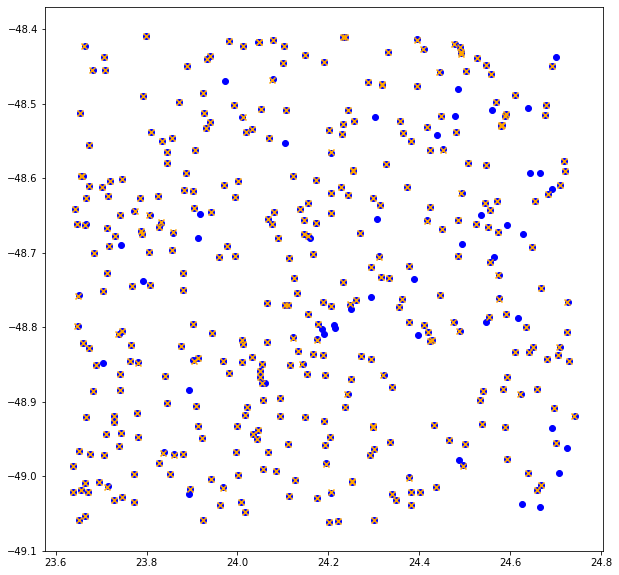

In [8]:
Science_image08 = ascii.read("GRB210605A5_20210608_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")

science08 = pd.DataFrame(Science_image08.as_array())

xworldsci08 = science08['X_WORLD']
yworldsci08 = science08['Y_WORLD']

xworld08_080910 = data08_080910_matches['X_WORLD']
yworld08_080910 = data08_080910_matches['Y_WORLD']

coordsci08 = SkyCoord(ra=xworldsci08*u.degree, dec=yworldsci08*u.degree)
coord08_080910 = SkyCoord(ra=xworld08_080910*u.degree, dec=yworld08_080910*u.degree)

idx, d2d, d3d = coord08_080910.match_to_catalog_sky(coordsci08)
#idx, d2d, d3d = coordsci08.match_to_catalog_sky(coord08_080910)

max_sep = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

data082_080910_matches = data08_080910_matches[sep_constraint] 
sci_data08_080910_matches = science08.iloc[idx[sep_constraint]]

#plotting down the subtraction and science image
xworld08_080910 = data08_080910_matches['X_WORLD']
yworld08_080910 = data08_080910_matches['Y_WORLD']

xworldsci08 = sci_data08_080910_matches['X_WORLD']
yworldsci08 = sci_data08_080910_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.scatter(xworld08_080910,yworld08_080910,color = 'b', marker = 'o')
plt.scatter(xworldsci08,yworldsci08, color = 'orange', marker = 'x')

# plt.xlim([24.6,24.8])
# plt.ylim([-48.6,-48.5])

(-49.1, -49.02)

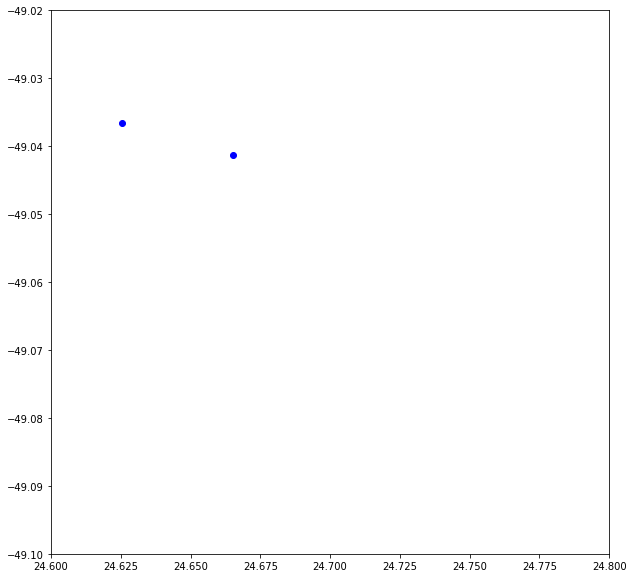

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(data08_080910_matches['X_WORLD'],data08_080910_matches['Y_WORLD'],color = 'b', marker = 'o')
plt.scatter(sci_data08_080910_matches['X_WORLD'],sci_data08_080910_matches['Y_WORLD'], color = 'orange', marker = 'x')

plt.xlim([24.6,24.8])
plt.ylim([-49.1,-49.02])

In [10]:
test2 = data08_080910_matches[ ((data08_080910_matches['X_WORLD'] > 24.6) & 
                                   (data08_080910_matches['X_WORLD'] < 24.8) &
                                   (data08_080910_matches['Y_WORLD'] < -49.02) & 
                                   (data08_080910_matches['Y_WORLD'] > -49.1))]
print(test2['X_WORLD'], test2['Y_WORLD'])


481    24.625575
489    24.665077
Name: X_WORLD, dtype: float64 481   -49.036627
489   -49.041367
Name: Y_WORLD, dtype: float64


In [11]:
test = sci_data08_080910_matches[ ((sci_data08_080910_matches['X_WORLD'] > 24.6) & 
                                   (sci_data08_080910_matches['X_WORLD'] > 24.7) &
                                   (sci_data08_080910_matches['Y_WORLD'] < -48.58) & 
                                   (sci_data08_080910_matches['Y_WORLD'] > -48.6))]

In [12]:
test2

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
481,482,6533.4850,123.5965,1.920,5037.3640,28.9676,1052.2594,340.6239,24.625575,-49.036627,...,0.245059,4.017,2.304,79.33,-10.98,191,7.89,0.000584,254,0.427
489,490,768.3085,101.0566,2.057,531.4535,28.9676,702.8280,274.4716,24.665077,-49.041367,...,-0.137232,2.894,2.155,-84.12,5.53,77,12.14,0.000898,90,0.255


In [13]:
sci_data08_080910_matches

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
24,25.0,4521.6090,41.73331,3.567,1376.9460,9.130355,4809.8022,17.3155,24.201289,-49.061394,...,30.24928,3.358,3.214,-2.31,87.68,244.0,6.48,0.000480,317.0,0.043
13,14.0,3003.3230,48.69851,4.384,662.9308,9.121090,4640.1660,27.0663,24.220453,-49.060668,...,30.30929,4.195,3.493,56.99,-33.03,249.0,10.10,0.000748,347.0,0.167
18,19.0,6441.1260,43.27490,3.704,1863.1880,9.121090,9682.2471,28.5543,23.650854,-49.059325,...,29.94981,3.456,3.323,-36.10,54.13,284.0,6.44,0.000477,343.0,0.039
9,10.0,2925.3400,40.02707,3.642,861.6298,9.121090,7267.7798,43.1942,23.923614,-49.059181,...,30.11625,3.159,3.105,-87.06,3.11,196.0,6.71,0.000497,240.0,0.017
6,7.0,2415.7260,45.32652,4.392,534.0479,9.130355,3932.7437,50.4447,24.300368,-49.058886,...,30.01255,3.654,3.456,-27.94,62.01,209.0,8.33,0.000616,266.0,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,16045.0,3629.3480,43.85710,3.811,995.3226,9.083937,4049.6848,7994.8882,24.285981,-48.470797,...,29.86397,3.558,3.313,65.37,-24.69,236.0,6.71,0.000497,303.0,0.069
17030,17031.0,3529.8760,41.17242,3.691,1020.2440,9.111816,9470.1182,8196.3701,23.680930,-48.454821,...,30.12307,3.332,3.109,9.24,-80.41,221.0,6.67,0.000494,279.0,0.067
17092,17093.0,7810.4960,51.93313,3.917,2051.9840,9.111816,9244.2324,8428.6855,23.706305,-48.437732,...,30.13742,4.898,3.385,-69.83,20.46,367.0,7.41,0.000548,478.0,0.309
18041,18042.0,674443.2000,50.15251,3.483,211431.8000,9.130355,4499.3813,8803.3994,24.235712,-48.410979,...,29.96911,3.941,3.893,-68.76,21.23,1913.0,6.10,0.000452,2325.0,0.012


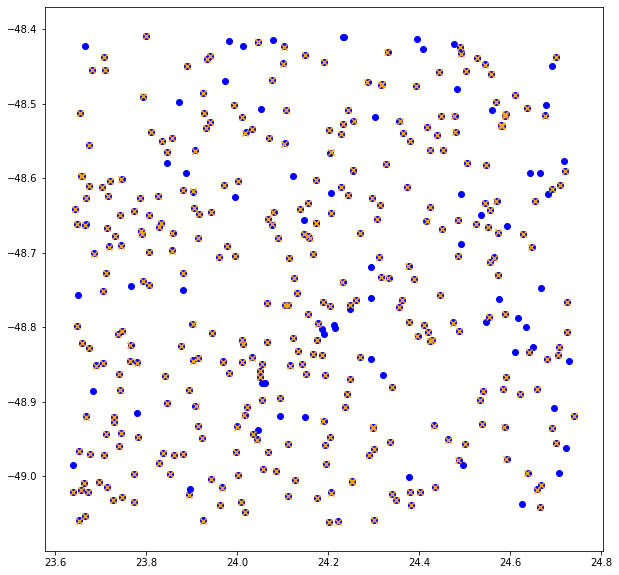

In [14]:
Science_image09 = ascii.read("GRB210605A5_20210609_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")

science09 = pd.DataFrame(Science_image09.as_array())

xworldsci09 = science09['X_WORLD']
yworldsci09 = science09['Y_WORLD']

xworld09_080910 = data09_080910_matches['X_WORLD']
yworld09_080910 = data09_080910_matches['Y_WORLD']

coordsci09 = SkyCoord(ra=xworldsci09*u.degree, dec=yworldsci09*u.degree)
coord09_080910 = SkyCoord(ra=xworld09_080910*u.degree, dec=yworld09_080910*u.degree)

idx, d2d, d3d = coord09_080910.match_to_catalog_sky(coordsci09)
#idx, d2d, d3d = coordsci08.match_to_catalog_sky(coord08_080910)

max_sep = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

data092_080910_matches = data09_080910_matches[sep_constraint] 
sci_data09_080910_matches = science09.iloc[idx[sep_constraint]]

#plotting down the subtraction and science image
xworld09_080910 = data09_080910_matches['X_WORLD']
yworld09_080910 = data09_080910_matches['Y_WORLD']

xworldsci09 = sci_data09_080910_matches['X_WORLD']
yworldsci09 = sci_data09_080910_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.scatter(xworld09_080910,yworld09_080910,color = 'b', marker = 'o')
plt.scatter(xworldsci09,yworldsci09, color = 'orange', marker = 'x')

In [15]:
sci_data09_080910_matches

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
81,82.0,4055.0070,40.01824,3.768,1134.9500,8.495668,4847.3140,75.9554,24.201288,-49.061393,...,27.34351,3.465,3.220,26.11,-63.90,239.0,6.82,0.000505,306.0,0.071
1,2.0,3027.2490,54.50183,5.381,506.2380,8.513024,4677.9258,85.7506,24.220424,-49.060664,...,27.31655,5.300,3.951,52.92,-37.09,312.0,14.53,0.001075,438.0,0.255
78,79.0,6190.1470,41.46733,3.861,1665.1970,8.530345,9719.5596,86.7881,23.650875,-49.059336,...,27.29008,3.508,3.457,33.55,-56.18,294.0,6.94,0.000514,379.0,0.015
120,121.0,2838.9780,38.32257,3.749,798.7787,8.486978,7304.9385,101.5268,23.923652,-49.059194,...,27.34199,3.463,2.981,59.62,-30.26,203.0,6.71,0.000497,243.0,0.139
119,120.0,2128.4580,42.65173,4.253,494.4178,8.460851,3970.3149,109.0528,24.300361,-49.058890,...,27.07247,3.569,3.318,-27.26,62.69,193.0,8.03,0.000594,262.0,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16843,16844.0,9101.6790,41.64492,3.738,2596.8180,8.530345,1647.4878,8183.3960,24.558354,-48.460638,...,27.42850,3.628,3.359,13.84,-76.40,345.0,6.41,0.000474,403.0,0.074
17949,17950.0,838.7623,40.06432,3.832,235.6698,8.521689,5321.9507,8549.2148,24.148192,-48.434138,...,27.28691,2.578,2.421,62.14,-27.84,88.0,8.01,0.000593,113.0,0.061
17990,17991.0,3527.3450,41.10985,3.866,962.6085,8.478277,4087.6895,8053.5557,24.285971,-48.470797,...,27.31525,3.669,3.260,55.51,-34.54,237.0,6.72,0.000497,295.0,0.112
18113,18114.0,3304.6270,37.49519,3.644,975.3617,8.538992,9507.9844,8254.7480,23.680938,-48.454821,...,27.26502,3.301,2.986,10.16,-79.49,206.0,6.58,0.000487,252.0,0.095


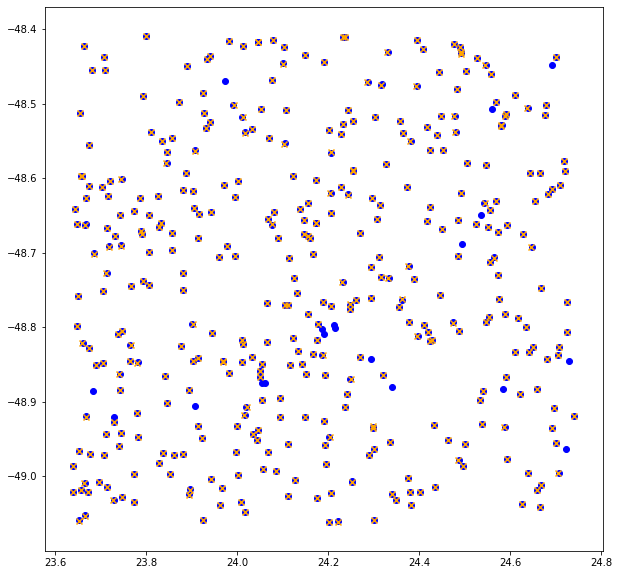

In [16]:
Science_image10 = ascii.read("GRB210605A5_20210610_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")

science10 = pd.DataFrame(Science_image10.as_array())

#science10f = science10[science10['MAG_AUTO'] < 20]

xworldsci10 = science10['X_WORLD']
yworldsci10 = science10['Y_WORLD']

xworld10_080910 = data10_080910_matches['X_WORLD']
yworld10_080910 = data10_080910_matches['Y_WORLD']

coordsci10 = SkyCoord(ra=xworldsci10*u.degree, dec=yworldsci10*u.degree)
coord10_080910 = SkyCoord(ra=xworld10_080910*u.degree, dec=yworld10_080910*u.degree)

idx, d2d, d3d = coord10_080910.match_to_catalog_sky(coordsci10)
#idx, d2d, d3d = coordsci10.match_to_catalog_sky(coord10_080910)

max_sep = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

data102_080910_matches = data10_080910_matches[sep_constraint] 
sci_data10_080910_matches = science10.iloc[idx[sep_constraint]]

#plotting down the subtraction and science image
xworld10_080910 = data10_080910_matches['X_WORLD']
yworld10_080910 = data10_080910_matches['Y_WORLD']

xworldsci10 = sci_data10_080910_matches['X_WORLD']
yworldsci10 = sci_data10_080910_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.scatter(xworld10_080910,yworld10_080910,color = 'b', marker = 'o')
plt.scatter(xworldsci10,yworldsci10, color = 'orange', marker = 'x')

In [17]:
sci_data10_080910_matches #these are the matches for the science 

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
50,51.0,3338.3510,27.87700,2.393,1770.6570,9.086214,4875.5615,48.5448,24.201300,-49.061388,...,32.32162,2.271,2.141,-75.53,14.47,128.0,4.17,0.000308,150.0,0.057
1,2.0,2508.3880,42.23801,3.795,752.4514,9.077013,4706.1797,58.3971,24.220436,-49.060655,...,32.22855,3.658,3.048,61.85,-28.17,206.0,9.35,0.000692,289.0,0.167
61,62.0,5170.9240,30.45552,2.511,2579.8550,9.049354,9747.8975,59.1737,23.650877,-49.059330,...,31.89618,2.496,2.286,-42.58,47.63,159.0,4.40,0.000326,200.0,0.084
92,93.0,2310.2900,27.42368,2.339,1256.6150,9.030867,7333.7539,74.0892,23.923600,-49.059183,...,32.04882,2.232,2.100,-58.14,31.99,110.0,4.11,0.000304,133.0,0.059
102,103.0,1832.5850,33.95815,3.036,715.2977,9.021608,3998.3335,81.8972,24.300399,-49.058870,...,32.00858,2.886,2.491,13.45,-76.63,133.0,5.15,0.000381,173.0,0.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20384,20385.0,660.1779,26.57253,2.444,339.2567,9.049354,5351.1016,8521.7754,24.148143,-48.434134,...,32.02097,2.061,1.958,7.38,-82.59,58.0,5.91,0.000438,81.0,0.050
19142,19143.0,2868.2210,28.24920,2.362,1541.4440,9.067802,4116.3804,8025.9229,24.285972,-48.470811,...,31.96352,2.306,2.141,27.68,-62.37,130.0,4.07,0.000302,163.0,0.072
20528,20529.0,2927.2440,29.05127,2.429,1527.1820,9.077013,9536.9326,8227.0283,23.680911,-48.454824,...,32.15553,2.336,2.230,78.52,-11.11,132.0,4.22,0.000312,157.0,0.045
20557,20558.0,6180.2110,30.79658,2.467,3143.3670,9.058582,9310.5264,8460.0498,23.706347,-48.437685,...,32.19421,2.500,2.395,-79.65,10.71,189.0,4.33,0.000320,226.0,0.042
